<a href="https://colab.research.google.com/github/idc315/presentation-1-group-9/blob/main/Youtube_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade google-api-python-client
!pip install --upgrade google-auth-oauthlib google-auth-httplib2
!pip install isodate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.137.0
    Uninstalling google-api-python-client-2.137.0:
      Successfully uninstalled google-api-python-client-2.137.0


In [ ]:
import pandas as pd
import numpy as np
import os

import google.oauth2.credentials
import google_auth_oauthlib.flow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google_auth_oauthlib.flow import InstalledAppFlow
import isodate

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone
import calendar

from scipy import stats
client_id = ''
_client_secret = ''


In [ ]:
API_KEY = ''

youtube = build('youtube', 'v3', developerKey=API_KEY)

def convert_duration(duration):
    try:
        duration = isodate.parse_duration(duration)
        return duration.total_seconds()
    except isodate.ISO8601Error:
        return 0

def get_videos_by_category(category_id, max_results, region_code='JP'):
    video_data = []
    next_page_token = None
    count = 0

    while count < max_results:
        response = youtube.search().list(
            part='snippet',
            type='video',
            videoCategoryId=category_id,
            maxResults=50,
            regionCode=region_code,
            pageToken=next_page_token
        ).execute()

        for item in response['items']:
            video_id = item['id']['videoId']
            video_info = youtube.videos().list(
                part='snippet,contentDetails,statistics',
                id=video_id
            ).execute()

            for video in video_info['items']:
                title = video['snippet']['title']
                upload_date = video['snippet']['publishedAt']
                views = video['statistics'].get('viewCount', 0) if 'statistics' in video else 0
                duration = video['contentDetails']['duration']
                length_seconds = convert_duration(duration)

                video_data.append({
                    'title': title,
                    'upload_date': upload_date,
                    'views': views,
                    'length_seconds': length_seconds
                })

                count += 1
                if count >= max_results:
                    break

        next_page_token = response.get('nextPageToken')

        if not next_page_token:
            break

    return video_data


category_id = '10'
video_data = get_videos_by_category(category_id, max_results=1000)

for video in video_data:
    print(f"Title: {video['title']}")
    print(f"Upload Date: {video['upload_date']}")
    print(f"Views: {video['views']}")
    print(f"Length (seconds): {video['length_seconds']}")
    print('-' * 50)


Title: Aimer「残響散歌」MUSIC VIDEO（テレビアニメ「鬼滅の刃」遊郭編オープニングテーマ）
Upload Date: 2021-12-12T15:00:11Z
Views: 234269992
Length (seconds): 182.0
--------------------------------------------------
Title: King & Prince「ツキヨミ」MV YouTube Edit
Upload Date: 2022-10-11T11:00:10Z
Views: 174001456
Length (seconds): 163.0
--------------------------------------------------
Title: TWICE 「Celebrate」 Music Video
Upload Date: 2022-07-14T15:00:32Z
Views: 79254788
Length (seconds): 186.0
--------------------------------------------------
Title: TXT(투모로우바이투게더) ‘Magic’ Special Performance Video
Upload Date: 2021-06-30T10:00:00Z
Views: 24729154
Length (seconds): 167.0
--------------------------------------------------
Title: ルパン三世のテーマ'80 - You & Explosion Band | 大野雄二ベスト・ヒット・ライブ 2022.01.28 at 東京国際フォーラム ホールA
Upload Date: 2022-05-30T11:00:18Z
Views: 7875672
Length (seconds): 216.0
--------------------------------------------------
Title: Aimer - 残響散歌 / THE FIRST TAKE
Upload Date: 2022-02-09T13:00:12Z
Views: 49198651
Length

In [ ]:
df = pd.DataFrame(video_data)
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df_sorted = df.sort_values(by=['views'], ascending=False)
df_sorted

,title,upload_date,views,length_seconds
36,米津玄師 Kenshi Yonezu - Lemon,2018-02-26T23:00:04Z,886067591,275.0
202,DAOKO × 米津玄師『打上花火』MUSIC VIDEO,2017-08-09T15:01:26Z,634536328,293.0
122,YOASOBI「アイドル」 Official Music Video,2023-04-12T15:30:09Z,537934444,226.0
103,Official髭男dism - Pretender［Official Video］,2019-04-16T13:58:12Z,532975808,336.0
78,"TWICE ""Feel Special"" M/V",2019-09-23T09:00:11Z,515986640,221.0
...,...,...,...,...
519,ライブハウスにガラクタドラムに飛び入りした結果！？#shorts #drums #ドラム #...,2024-10-16T09:22:22Z,108,32.0
552,日本武道館ライブ回数ランキングTOP10 #音楽 #雑学 #日本武道館 #ライブ #武道館...,2024-10-16T10:23:24Z,99,60.0
412,【TikTokで話題】実力派歌い手グループが『Bunny Girl』本気で歌ってみたら… #...,2024-10-16T10:19:55Z,96,23.0
603,定番マウスピース吹き比べてみました！#サックス #サックス奏者 #サックス好きと繋がりたい ...,2024-10-16T10:01:11Z,55,36.0


In [ ]:
df.isnull().sum()

,0
title,0
upload_date,0
views,0
length_seconds,0


# **HYPOTHESIS 1**

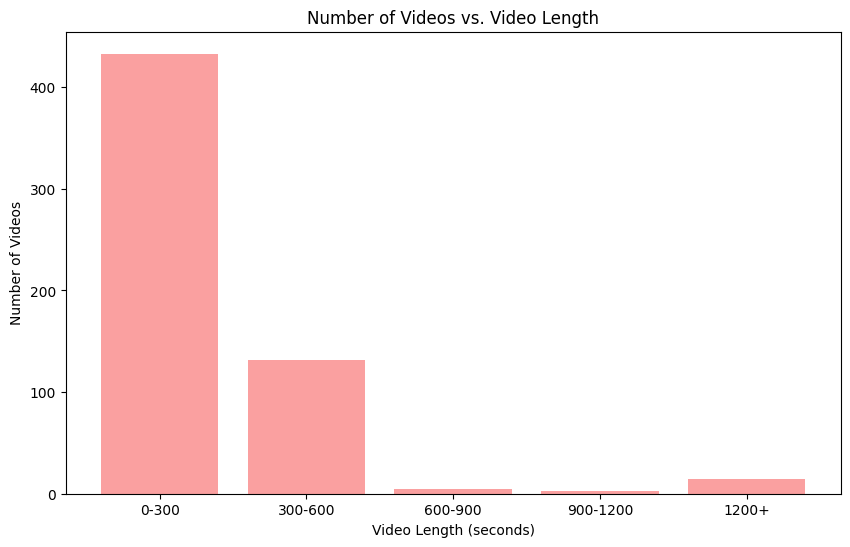

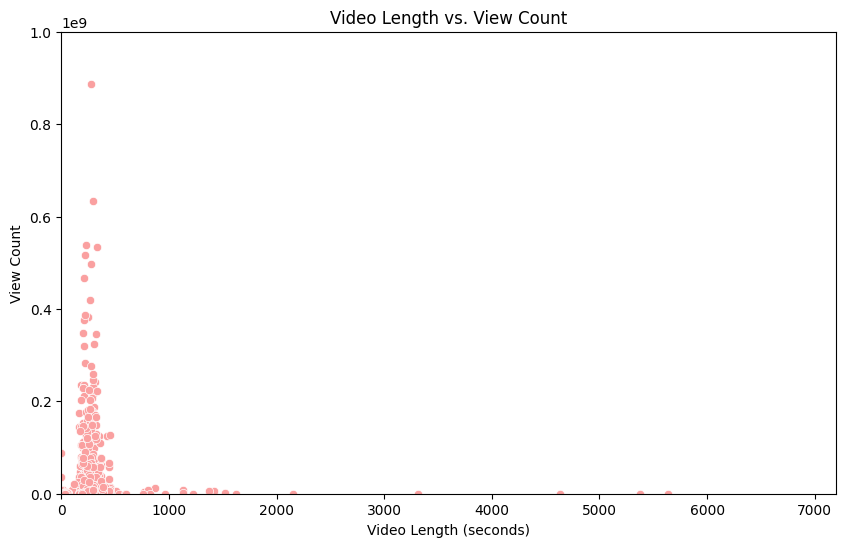


Correlation between video length and view count: -0.05032574395503037


In [ ]:
df['views'] = pd.to_numeric(df['views'])

bins = [0, 300, 600, 900, 1200, float('inf')]
labels = ['0-300', '300-600', '600-900', '900-1200', '1200+']
df['length_bin'] = pd.cut(df['length_seconds'], bins=bins, labels=labels)

video_counts = df['length_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(video_counts.index, video_counts.values, color='#FAA0A0')
plt.title('Number of Videos vs. Video Length')
plt.xlabel('Video Length (seconds)')
plt.ylabel('Number of Videos')
plt.show()

print()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='length_seconds', y='views', data=df, color='#FAA0A0')
plt.title('Video Length vs. View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.ylim(0, 1000000000)
plt.xlim(0, 7200)
plt.show()

correlation = df['length_seconds'].corr(df['views'])
print()
print(f"Correlation between video length and view count: {correlation}")


In [ ]:
longer_vid = df[df['length_seconds'] > 600]['views']

shorter_vid = df[df['length_seconds'] <= 600]['views']

t_statistic, p_value = stats.ttest_ind(shorter_vid, longer_vid,alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that videos under 10 minutes receive more views compared to other video.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that videos under 10 minutes receive more views compared to other video.")

T-statistic: 2.521671395846476
P-value: 0.005968190922599911
Reject the null hypothesis.
There is evidence to suggest that videos under 10 minutes receive more views compared to other video.


# **HYPOTHESIS 2**

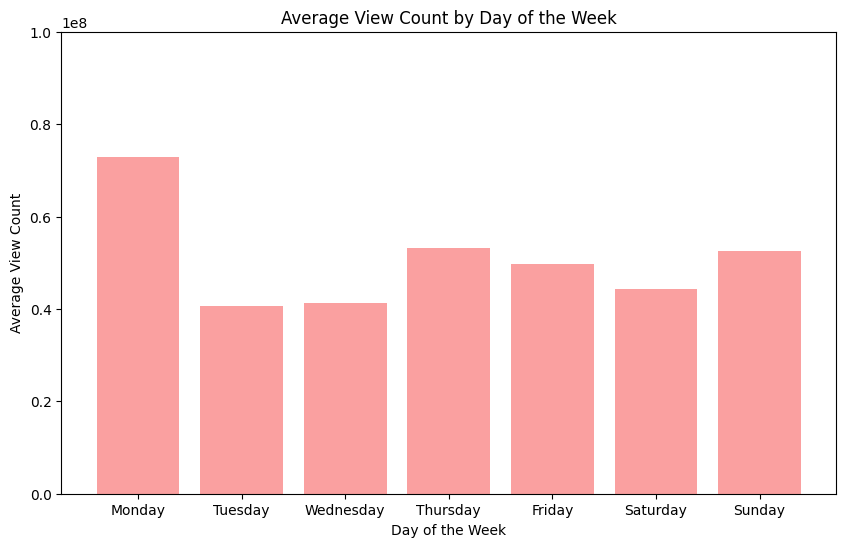

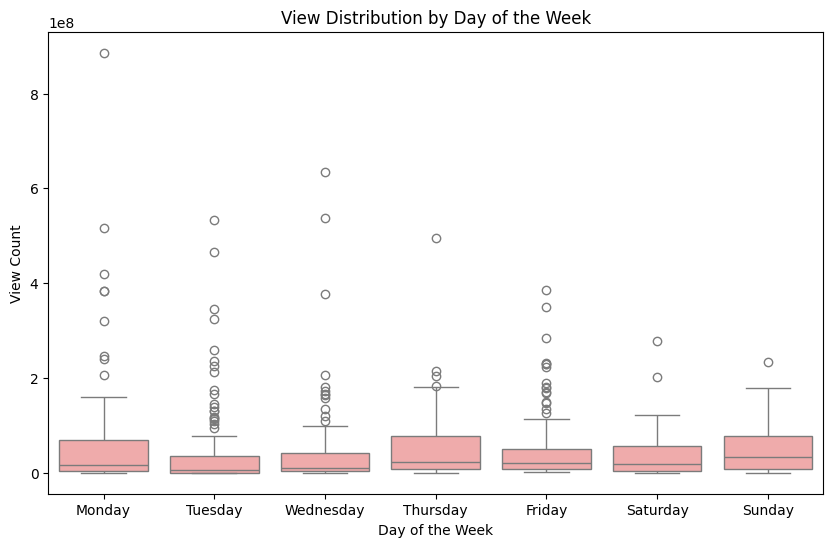

In [ ]:
df['upload_date'] = pd.to_datetime(df['upload_date'], utc=True)
df['day_of_week'] = df['upload_date'].dt.dayofweek
df['month'] = df['upload_date'].dt.month
average_views_by_day = df.groupby('day_of_week')['views'].mean()
average_views_by_month = df.groupby('month')['views'].mean()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_names = [calendar.month_name[i] for i in range(1, 13)]

plt.figure(figsize=(10, 6))
plt.bar(average_views_by_day.index, average_views_by_day.values, color='#FAA0A0')
plt.title('Average View Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average View Count')
plt.ylim(0, 100000000)
plt.xticks(average_views_by_day.index, day_names)
plt.show()

print()

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='views', data=df, color='#FAA0A0')
plt.title('View Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('View Count')
plt.xticks(ticks=range(7), labels=day_names)
plt.show()



In [ ]:
weekend_df = df[(df['day_of_week'] == 5) | (df['day_of_week'] == 6)]
weekday_df = df[(df['day_of_week'] != 5) & (df['day_of_week'] != 6)]

weekend_views = weekend_df['views']
weekday_views = weekday_df['views']


t_statistic, p_value = stats.ttest_ind(weekend_views, weekday_views,alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is not enough evidence to suggest that videos are released in the weekends have higher views compare to weekdays")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that videos are released in the weekends have higher views compare to weekdays.")

T-statistic: -0.08277325603221812
P-value: 0.5329703482323194
Fail to reject the null hypothesis.
There is not enough evidence to suggest that videos are released in the weekends have higher views compare to weekdays.


# **HYPOTHESIS 3**

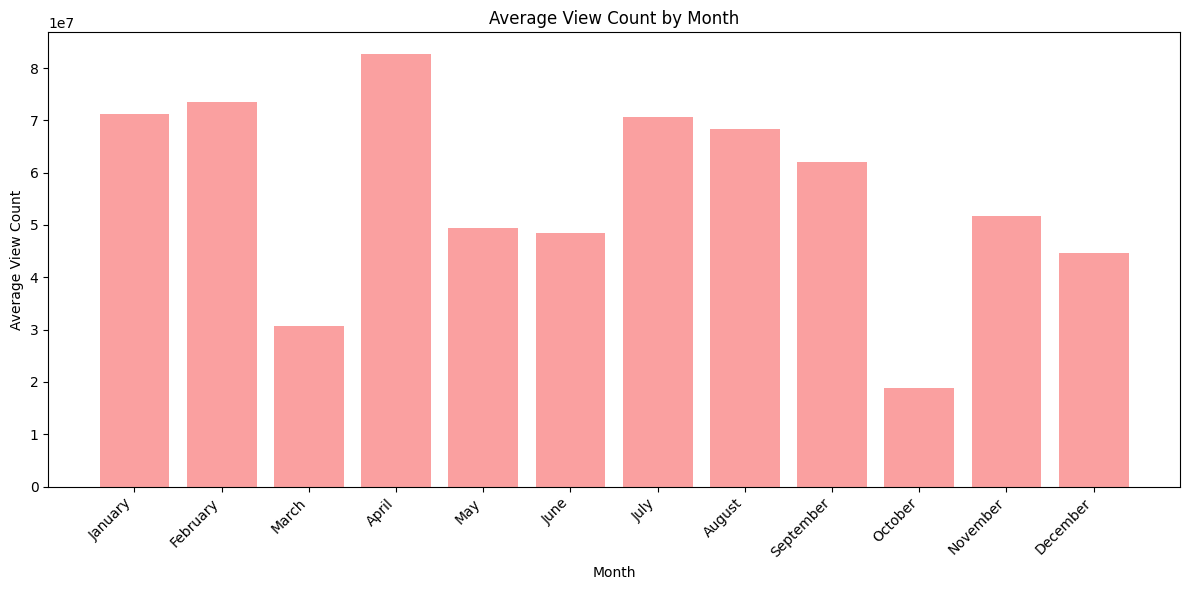

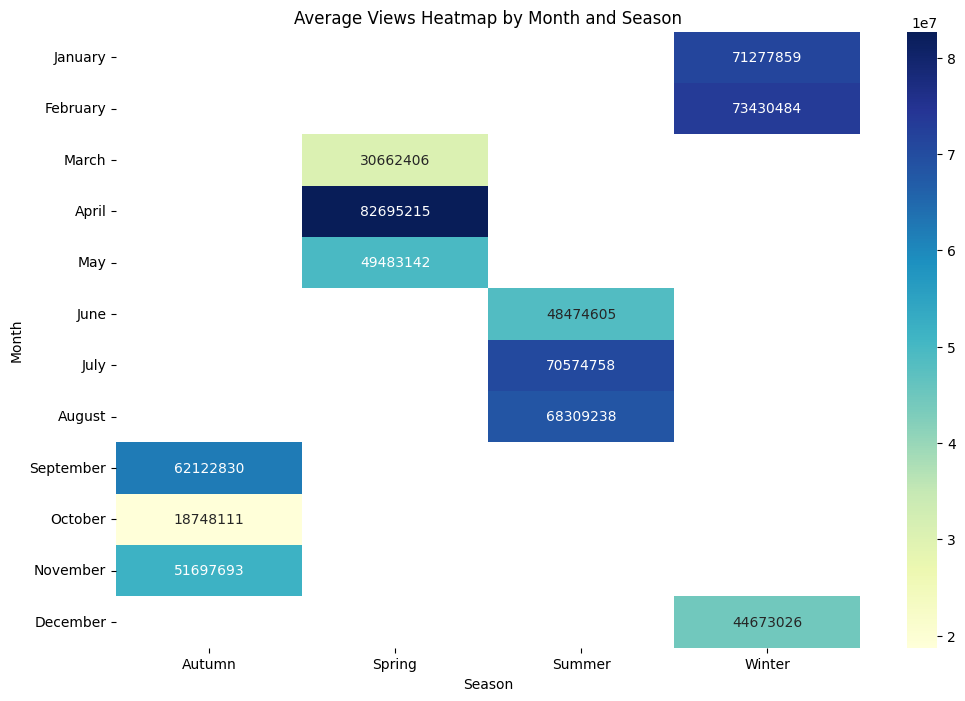

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(average_views_by_month.index, average_views_by_month.values, color='#FAA0A0')
plt.title('Average View Count by Month')
plt.xlabel('Month')
plt.ylabel('Average View Count')
plt.xticks(average_views_by_month.index, month_names, rotation=45, ha='right')
plt.tight_layout()
plt.show()

print()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)
heatmap_data = pd.pivot_table(df, values='views', index='month', columns='season', aggfunc='mean')


heatmap_data.index = [calendar.month_name[i] for i in heatmap_data.index]


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Views Heatmap by Month and Season')
plt.xlabel('Season')
plt.ylabel('Month')
plt.show()

In [ ]:
summer_view = df[df['season'] == 'Summer']['views']
others_view = df[df['season'] != 'Summer']['views']

t_statistic, p_value = stats.ttest_ind(summer_view, others_view,alternative='greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that videos are released on summer have higher views than other times in the year.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that videos are released on summer have higher views than other times in the year.")




T-statistic: 2.1477151447974965
P-value: 0.01606711824405441
Reject the null hypothesis.
There is evidence to suggest that videos are released on summer have higher views than other times in the year.
